AI-generated Notebook for Dandiset 001275 with Human Supervision

**Important:** This notebook was AI-generated with human supervision and has not been fully verified. Use caution when interpreting the code or results.

Introduction to Dandiset 001275

This notebook provides an introduction to Dandiset 001275, "Mental navigation primate PPC Neupane_Fiete_Jazayeri," which contains neurophysiology data collected from two primates during a mental navigation task. The data is associated with a previously published study (https://doi.org/10.1038/s41586-024-07557-z).

The dataset includes data from the entorhinal cortex and covers units, electrode groups, processing modules, spatial series, and electrical series.

# Key Metadata

- **Name:** Mental navigation primate PPC Neupane_Fiete_Jazayeri
- **Description:** This dataset contains neurophysiology data collected from two primates during a mental navigation task.
- **Contributor:** Neupane, Sujaya
- **Number of Subjects:** 2

# Accessing the Data

The data is open access and available on the DANDI archive: https://dandiarchive.org/dandiset/001275/draft

To begin, you'll need to install the necessary packages:
```bash
pip install pynwb lindi matplotlib seaborn
```

In [1]:
# Use the DANDI API to list all of the assets in the Dandiset
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001275")
assets = list(dandiset.get_assets())
assets

[RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x7742e1672c60>, identifier='fdec0520-4eb7-455f-8f1f-29dfe675b7a6', path='sub-mahler/sub-mahler_ses-03122021_behavior+ecephys.nwb', size=368370630, created=datetime.datetime(2024, 12, 5, 21, 20, 32, 491014, tzinfo=TzInfo(UTC)), modified=datetime.datetime(2024, 12, 5, 21, 20, 32, 491029, tzinfo=TzInfo(UTC)), blob='3f065ae0-6839-4574-be9f-ab1a4fe4c1dc', dandiset_id='001275', version_id='draft'),
 RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x7742e1672c60>, identifier='8b0d2526-99a0-4406-af2e-c1de7ba00246', path='sub-mahler/sub-mahler_ses-03172021_behavior+ecephys.nwb', size=453971245, created=datetime.datetime(2024, 12, 5, 21, 20, 36, 557784, tzinfo=TzInfo(UTC)), modified=datetime.datetime(2024, 12, 5, 21, 20, 36, 557807, tzinfo=TzInfo(UTC)), blob='e48536db-f73c-4667-a4d4-a8c5828c14b8', dandiset_id='001275', version_id='draft'),
 RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x7742e1672

Exploring the Dataset Structure

In [2]:
# Load an NWB file and explore its contents
import pynwb
import lindi
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Load the NWB file
# Replace with the appropriate asset from the dandiset
nwb_file_url = "https://lindi.neurosift.org/dandi/dandisets/001275/assets/b0bbeb4c-5e0d-4050-a993-798173797d94/nwb.lindi.json"
f = lindi.LindiH5pyFile.from_lindi_file(nwb_file_url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Dataset Structure and Contents

In [3]:
# Print basic information about the NWB file

print("Session description:", nwb.session_description)
print("Identifier:", nwb.identifier)
print("Session start time:", nwb.session_start_time)

Session description: Data from macaque performing mental navigation task. Subject is presented with a start and a target landmark, sampled from a linear map of 6 landmarks on a screen. After a delay, the subject is then cued with a go signal to navigate from start to target landmark with a joystick. Subject should respond by deflecting the joystick in the right direction and holding it until the subject thinks it has arrived at the target landmark. The visual drift or intervening landmarks are all occluded from view making the task a purely mental navigation.
Identifier: 15de6847-1f57-4247-847b-af4b179d1b7c
Session start time: 2020-01-04 00:00:00-05:00


Exploring Trials Data

In [4]:
# Explore trials data
trials = nwb.intervals["trials"]
print("Trials start time:", trials["start_time"].data.shape)
print("Trials stop time:", trials["stop_time"].data.shape)

Trials start time: (1885,)
Trials stop time: (1885,)


Accessing and Visualizing Sample Data

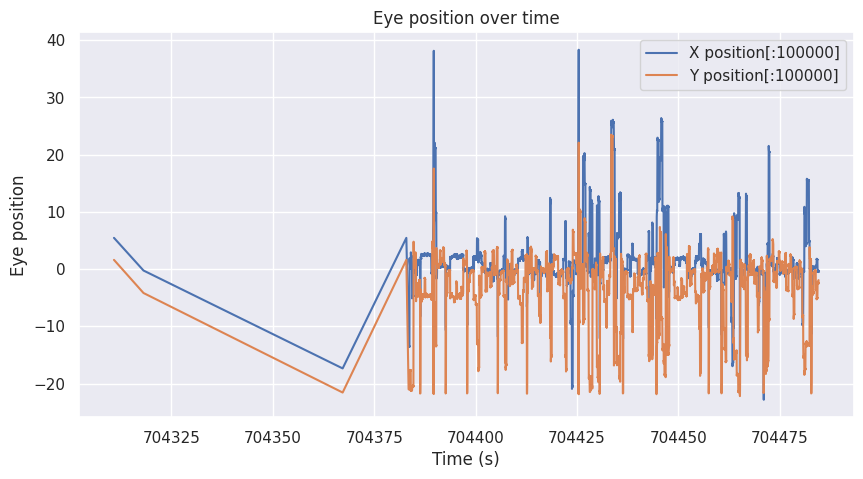

In [5]:
# Access eye position data
behavior = nwb.processing["behavior"]
eye_position = behavior["eye_position"]
eye_position_data = eye_position.data[:100000]
eye_position_timestamps = eye_position.timestamps[:100000]

# Plot eye position
plt.figure(figsize=(10, 5))
plt.plot(eye_position_timestamps, eye_position_data[:, 0], label="X position[:100000]")
plt.plot(eye_position_timestamps, eye_position_data[:, 1], label="Y position[:100000]")
plt.xlabel("Time (s)")
plt.ylabel("Eye position")
plt.title("Eye position over time")
plt.legend()
plt.show()

Hand Position Data

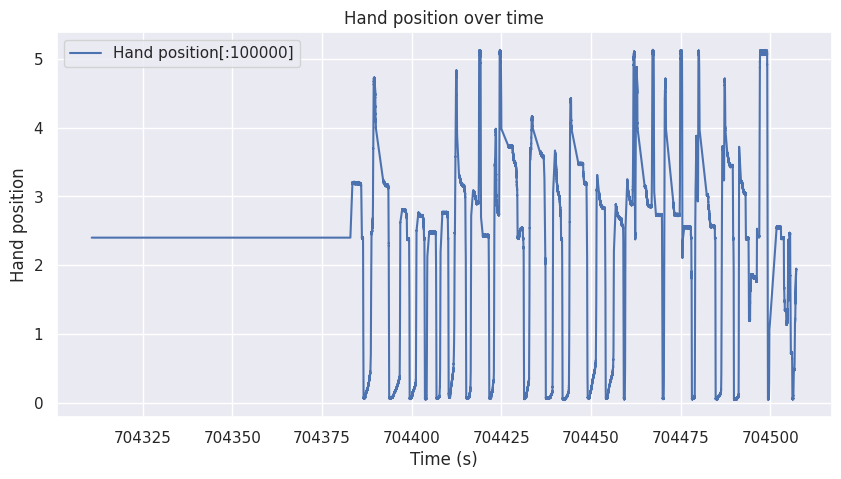

In [6]:
# Access hand position data
hand_position = behavior["hand_position"]
hand_position_data = hand_position.data[:100000]
hand_position_timestamps = hand_position.timestamps[:100000]

# Plot hand position
plt.figure(figsize=(10, 5))
plt.plot(hand_position_timestamps, hand_position_data, label="Hand position[:100000]")
plt.xlabel("Time (s)")
plt.ylabel("Hand position")
plt.title("Hand position over time")
plt.legend()
plt.show()

Units Data

Column names: ('spike_times', 'unit_name', 'amp', 'ch', 'ContamPct', 'original_cluster_id', 'Amplitude', 'n_spikes', 'depth', 'quality', 'sh', 'KSLabel', 'fr')
Number of units: 68


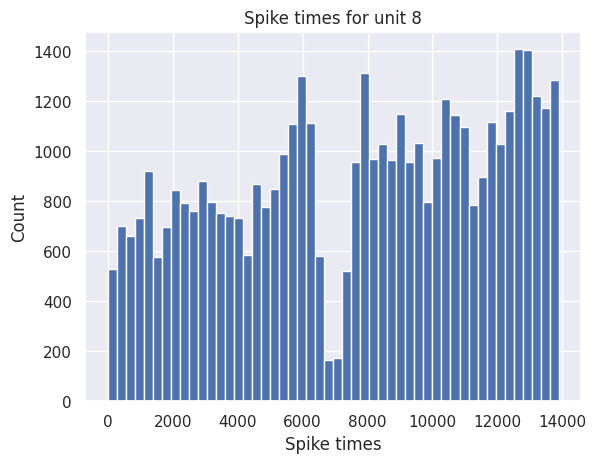

In [7]:
# Access units data
units = nwb.processing["ecephys"]["units"]
print("Column names:", units.colnames)

unit_ids = units["id"].data[:]
print("Number of units:", len(unit_ids))

# Plot histogram of spike times for a random unit
unit_index = np.random.randint(0, len(unit_ids))
spike_times = units["spike_times"][unit_index]
plt.figure()
plt.hist(spike_times, bins=50)
plt.xlabel("Spike times")
plt.ylabel("Count")
plt.title(f"Spike times for unit {unit_ids[unit_index]}")
plt.show()

Examples of Common Analyses

In [8]:
# Example: Calculate the mean firing rate for each unit
units = nwb.processing["ecephys"]["units"]
firing_rates = units["fr"].data[:]
print("Mean firing rate for each unit:", firing_rates)
print("Mean firing rate across units:", np.mean(firing_rates))

Mean firing rate for each unit: [7.00517257e+00 1.21485014e+01 5.47262000e-03 1.14969713e+01
 4.89122819e+00 1.47983307e+01 6.54986479e+00 6.74817534e+00
 3.25858654e+00 3.74443000e-03 9.02298601e+00 6.43875616e+00
 8.00745454e+00 6.06172129e+00 1.42226253e+01 7.77659629e+00
 4.97130129e+00 8.54146726e+00 3.03377697e+00 6.66860630e+00
 7.92090000e-04 1.36816000e-03 2.16020000e-04 7.20080000e-04
 3.76912459e+00 4.32050000e-04 1.00588238e+00 7.91614815e+00
 7.20080000e-04 1.68362345e+00 8.59979389e+00 6.56628266e+00
 5.34185543e+00 9.08556113e+00 2.07909242e+00 3.69762050e-01
 1.21834254e+01 2.17813248e+01 1.22688271e+01 7.50606152e+00
 3.54085864e+00 1.99174650e-01 5.81012468e+00 1.57800904e+01
 1.62675858e+01 3.20004390e-01 7.69061851e+00 1.24211964e+01
 2.13981692e+01 1.15501130e-01 6.40836870e+00 1.82900800e-01
 2.71650890e+00 4.95632360e-01 4.24200236e+00 3.12161976e+01
 2.58192559e+00 4.32970834e+00 6.49045804e+00 1.51852307e+01
 7.41540320e-01 2.42019520e+00 1.90821700e-02 4.73957